# Data Analysis on ABC's Customer support dataset

# 1. Importing useful libraries and loading data into the data frame 

In [1]:
# The following libraries would be used for understanding the dataset and performing analysis through 
#graphs,visualization etc.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Load data into dataframe
customer_support_data = pd.read_csv('Dataset_aftersales.csv')
customer_support_data.head()

asst_id product_type  mnfture_wk  contract_st  contract_end  contact_wk  \
0        0      Laptops      201726       201726        202125      201840   
1        1      Laptops      201650       201650        201949      201840   
2        2      Laptops      201821       201821        202222      201840   
3        3      Laptops      201608       201608        201908      201840   
4        4      Laptops      201732       201732        202032      201840   

  contact_type  issue_type topic_category                    parts_sent  \
0        Voice         NaN            NaN  Hard Drive, Documentation(2)   
1        Voice         NaN            NaN              Speaker, Chassis   
2        Voice         NaN            NaN                        Cables   
3        VOICE  Hard Drive        Booting                    Hard Drive   
4        Voice         NaN            NaN            Battery (Notebook)   

  repair_type  repeat_ct  parts_ct  agent_tenure_indays  contact_manager_flg  \
0        Hard          0         3               1018.0                    0   
1        Hard          0         2               1018.0                    0   
2        Hard          0         1               1018.0                    0   
3        Hard          0         1                298.0                    0   
4        Hard          0         1               1018.0                    0   

       diagnostics                                  repeat_parts_sent  \
0         Not_USED                                                NaN   
1         Not_USED                                                NaN   
2         Not_USED  Motherboard, Miscellaneous(2), Hard Drive, Cha...   
3  Effective_Usage                                                NaN   
4         Not_USED                                                NaN   

     region            country  
0  Hogwarts                NaN  
1  Hogwarts  Zonko's Joke Shop  
2  Hogwarts  Zonko's Joke Shop  
3  Hogwarts  Zonko's Joke Shop  
4  Hogwarts  Zonko's Joke Shop

# 2. Data Preprocessing

In [3]:
#size of dataframe in rows and cols
customer_support_data.shape

(100000, 19)


We can see that the dataset has 100000 rows and 19 columns or features. We now further explore this dataset by checking for datatypes, missing values, nulls etc.

In [4]:
#Descriptive stats on numeric data
customer_support_data.describe()

asst_id     mnfture_wk    contract_st   contract_end  contact_wk  \
count  100000.000000  100000.000000  100000.000000  100000.000000    100000.0   
mean    35702.117890  201672.108910  201671.595910  201951.897740    201840.0   
std     25038.092288     156.139692     158.940598     186.777325         0.0   
min         0.000000  201001.000000  200547.000000  201006.000000    201840.0   
25%     12382.750000  201612.000000  201612.000000  201903.000000    201840.0   
50%     32898.500000  201719.000000  201720.000000  201938.000000    201840.0   
75%     57701.250000  201808.000000  201809.000000  202045.000000    201840.0   
max     82441.000000  201927.000000  202630.000000  202953.000000    201840.0   

           repeat_ct      parts_ct  agent_tenure_indays  contact_manager_flg  
count  100000.000000  100000.00000         99986.000000        100000.000000  
mean        0.074090       1.15955           985.886844             0.012430  
std         0.262491       1.56942           862.044503             0.110795  
min         0.000000       0.00000           218.000000             0.000000  
25%         0.000000       0.00000           536.000000             0.000000  
50%         0.000000       1.00000           801.000000             0.000000  
75%         0.000000       2.00000          1018.000000             0.000000  
max         3.000000      51.00000          8922.000000             1.000000

The above output provides some statistical results for the numeric variables. We can guess the presence of outliers in part count as the range of values is very high, between 0 to 51, and it doesn't seem quite a possibility of having 51 parts replaced in a product. The other column statistics are also shown with the min, max, avg , sd and quartile values.

In [5]:
#info() function provides information on number of columns, non null values and datatypes
customer_support_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   asst_id              100000 non-null  int64  
 1   product_type         99980 non-null   object 
 2   mnfture_wk           100000 non-null  int64  
 3   contract_st          100000 non-null  int64  
 4   contract_end         100000 non-null  int64  
 5   contact_wk           100000 non-null  int64  
 6   contact_type         99986 non-null   object 
 7   issue_type           85958 non-null   object 
 8   topic_category       66916 non-null   object 
 9   parts_sent           54566 non-null   object 
 10  repair_type          100000 non-null  object 
 11  repeat_ct            100000 non-null  int64  
 12  parts_ct             100000 non-null  int64  
 13  agent_tenure_indays  99986 non-null   float64
 14  contact_manager_flg  100000 non-null  int64  
 15  diagnostics       

The above output shows all the feature variables and their datatypes and number of non-null values. Looking at the results, we can conclude that some columns have null values. Our next step would be to explore these values.

In [6]:
#Check for duplicate rows
customer_support_data.duplicated().value_counts()

False    86536
True     13464
dtype: int64

In [7]:
#Drop duplicate rows 
customer_support_data.drop_duplicates(inplace=True)

In [8]:
#after dropping duplicate rows:
customer_support_data.shape

(86536, 19)

### Handling null values:

In [9]:
#Null value count
customer_support_data.isnull().sum().sort_values(ascending=False)

repeat_parts_sent      74973
parts_sent             39339
topic_category         28621
issue_type             12162
country                10002
product_type              20
agent_tenure_indays       10
contact_type              10
region                     3
parts_ct                   0
repeat_ct                  0
repair_type                0
contact_manager_flg        0
diagnostics                0
contact_wk                 0
contract_end               0
contract_st                0
mnfture_wk                 0
asst_id                    0
dtype: int64

We see that there are multiple columns having null values. We can now calculate the null values percentage in the dataset.

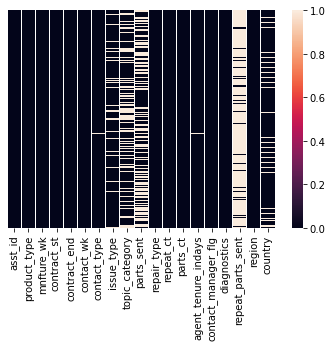

In [10]:
#Heatmap for nulls
sns.heatmap(customer_support_data.isnull(), yticklabels=False)

In [11]:
#Percentage of missing values
(customer_support_data.isnull().sum()/len(customer_support_data)).sort_values(ascending=False)

repeat_parts_sent      0.866379
parts_sent             0.454597
topic_category         0.330741
issue_type             0.140543
country                0.115582
product_type           0.000231
agent_tenure_indays    0.000116
contact_type           0.000116
region                 0.000035
parts_ct               0.000000
repeat_ct              0.000000
repair_type            0.000000
contact_manager_flg    0.000000
diagnostics            0.000000
contact_wk             0.000000
contract_end           0.000000
contract_st            0.000000
mnfture_wk             0.000000
asst_id                0.000000
dtype: float64

We see above that nearly 87% of repeat_parts_sent and 45% of the parts_sent column data is missing. 
The percentage of missing data in product_type, agent_tenure_indays, contact_type and region is very low. Hence we can eliminate these rows as their absence would not impact the overall data analysis.

Missing data in the columns country, topic_category and issue_type cannot be eliminated as they constitute more than 10% of the actual data. As these are categorical fields, we cannot fill in the missing data using any one value, since the existing data is varied. Hence the best way to deal with them is to fill it with 'Unknown'.

In the further steps we will deal with the null values step by step:

1. Drop the rows for columns that have very low percentage of null values:

In [12]:
customer_support_data.dropna(subset=['product_type'],axis=0, inplace=True)

In [13]:
len(customer_support_data.product_type) #To check if the rows have been dropped

86516

In [14]:
customer_support_data.dropna(subset=['agent_tenure_indays'], axis=0, inplace=True)

In [15]:
len(customer_support_data.agent_tenure_indays)

86506

In [16]:
customer_support_data.dropna(subset=['contact_type'], axis=0, inplace=True)

In [17]:
len(customer_support_data.contact_type)

86506

In [18]:
customer_support_data.dropna(subset=['region'],axis=0, inplace=True)

In [19]:
len(customer_support_data.region)

86503

2. Handle missing values by filling NaNs:

Now we handle the missing values in columns issue_type, topic_category and country. As the values for these columns cannot be filled using any one particular value and since a significant amount of data is missing in each of these rows, the best approach would be to replace NaNs with 'Unknown'.

In [20]:
#Nulls in topic category
customer_support_data.topic_category.fillna('Unknown', inplace=True)

In [21]:
customer_support_data.topic_category.unique()

array(['Unknown', 'Booting', 'General Queries', 'OS', 'Hard Drive',
       'Touchpad', 'Call Logs', 'Internet/Wireless', 'Mouse',
       'Motherboard', 'Keyboard', 'Battery', 'App/Software',
       'LCD/Monitor', 'System Performance', 'Audio Device',
       'Initial Setup', 'Physical Damage', 'Other', 'BIOS', 'Shutdown',
       'CD/DVD Drive', 'System Warning', 'Palmrest', 'Fan', 'Power',
       'Antivirus', 'Bluetooth', 'Graphics Card', 'Printer/Scanner',
       'USB', 'Email', 'Drivers', 'AC Adaptor', 'Controller',
       'Microsoft Office', 'Virus/Adware/Malware/Spyware', 'Media',
       'Microsoft Account', 'Webcam', 'Junk', 'Docking', 'SD Card',
       'Touchscreen', 'Memory', 'DC Port', 'DOA', 'System Configuration',
       'Missing Parts', 'Bit Locker', 'Firmware', 'System update', 'Data',
       'Sim Card', 'Stylus', 'Camera', 'Incorrect Shipment', 'Odor',
       'Vmware', 'CPU', 'Replacement', 'Storage', 'Start-Up', 'Miracast'],
      dtype=object)

In [22]:
#Nulls in issue type
customer_support_data.issue_type.fillna('Unknown', inplace=True)

In [23]:
customer_support_data.issue_type.unique()

array(['Unknown', 'Hard Drive', 'Fee Based Support',
       'Audio, Video, Speakers, TV Tuner', 'Contract or Service Issue',
       'Backup / Recovery Software', 'Operating System',
       'Dell Mobile / Wireless Devices', 'Battery / CMOS',
       'System Board Components', 'Stage', 'Network Software',
       'Information Status', 'Battery/CMOS',
       'Power Subsystem / Cables / AC Adapter',
       'Networking Hardware NICs / Switches', 'Memory / Processor',
       'Input Device / Webcam', 'Restricted', 'Burn, Playback, Audio',
       'Microsoft Apps', 'Backplane', 'DDPE Remotely Managed',
       'Mechanical Chassis / Rack', 'Customer Confirmed CID',
       'Optical drive', 'Controller / Controller Card', 'Imaging Device',
       'Dell Net Ready', 'Media Only Dispatch',
       'Optical Drive/Media Card Reader', 'Security / Antivirus Software',
       'Retail / Channel Returns', 'Maintenance', 'Information Request',
       'Non Dell Environment', 'FQM Program', 'System Out of Box',
  

In [24]:
#Nulls in Country
customer_support_data.country.fillna('Unknown', inplace=True)

In [25]:
customer_support_data.country.unique()

array(['Unknown', "Zonko's Joke Shop", 'Lorien', 'The Shire', 'Mordor',
       'Merope', 'Pollux', 'Three Broomsticks', 'Shrieking Shack',
       'Ravenclaw', 'Hufflepuff', 'Capella', "Honeyduke's", 'Polaris',
       'Fomalhaut', 'Hobbiton', 'Sabik', 'Spica', 'Becrux', 'Vega',
       'Rohan', 'Gondor', 'Aldebaran', 'Mintaka', 'Rukbat', 'Acrux',
       'Canopus', 'Rigel', 'Antares', 'Diagon Alley', 'Gryffindor',
       'Isengard', 'Procyon', 'Bree', 'Pleione', 'Regulus', 'Erebor',
       'Fangorn', 'Castor', 'Alcor', 'Minas Tirith', 'Arcturus',
       'Rivendell', 'Mirkwood', 'Sirius', 'Altair', 'Betelgeuse',
       "Helm's Deep", 'Muscida', "Hog's Head Inn", 'Bellatrix', 'Mizar',
       'Slytherin', 'Moria'], dtype=object)

Thus,  all the nulls have been removed and now we are left with parts_sent and repair_parts_sent columns.
To fill in null values in parts_sent column, we first need to create a new column using custom binary encoding and group by using the parts_ct to check if parts_ct is 0 when the parts_sent is 0.

In [26]:
#Handling null values for parts_sent
customer_support_data['parts_sent_encoded']=np.where(customer_support_data['parts_sent'].isnull(),0,1)
customer_support_data.groupby('parts_sent_encoded')['parts_ct'].apply(lambda x: list(np.unique(x)))

parts_sent_encoded
0                                                  [0]
1    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
Name: parts_ct, dtype: object

 We create a dummy variable 'parts_sent_encoded' for custom binary encoding where all nulls are representated as 0 and the non-nulls are representated as 1. Looking at the above result, we infer that the when parts_sent is null, parts_ct is 0. This means that no part was sent  when part_ct is 0. Thus, we can directly substitute the null values in parts_sent with 'No part sent' as inferred from above.

In [27]:
#replacing nulls in parts_sent with 'No part sent'
customer_support_data.parts_sent.fillna('No part sent', inplace=True)

As we don't have any supporting data for repeat_parts_sent column as parts_sent, we will fill the nulls with a value 'Unknown'.

In [28]:
#Nulls for column 'repeat_parts_sent'
customer_support_data.repeat_parts_sent.fillna('Unknown', inplace=True)

In [29]:
#All Nulls removed
customer_support_data.isnull().sum().sort_values(ascending=False)

parts_sent_encoded     0
country                0
product_type           0
mnfture_wk             0
contract_st            0
contract_end           0
contact_wk             0
contact_type           0
issue_type             0
topic_category         0
parts_sent             0
repair_type            0
repeat_ct              0
parts_ct               0
agent_tenure_indays    0
contact_manager_flg    0
diagnostics            0
repeat_parts_sent      0
region                 0
asst_id                0
dtype: int64

In [30]:
customer_support_data.drop('parts_sent_encoded',axis=1,inplace=True)

### Handling inconsistent values /dirty data

We now check for unique values and inconsistencies in the data. We can also observe that the dataframe consists of both numerical and categorical columns. We can identify these columns for further analysis


In [31]:
numcols = customer_support_data.dtypes[customer_support_data.dtypes != "object"].index
print("Numerical columns: ", len(numcols))
catcols = customer_support_data.dtypes[customer_support_data.dtypes == "object"].index
print("Categorical columns: ", len(catcols))

Numerical columns:  9
Categorical columns:  10


In [32]:
#Numeric columns
numcols

Index(['asst_id', 'mnfture_wk', 'contract_st', 'contract_end', 'contact_wk',
       'repeat_ct', 'parts_ct', 'agent_tenure_indays', 'contact_manager_flg'],
      dtype='object')

In [33]:
#Categorical Columns
catcols

Index(['product_type', 'contact_type', 'issue_type', 'topic_category',
       'parts_sent', 'repair_type', 'diagnostics', 'repeat_parts_sent',
       'region', 'country'],
      dtype='object')

In [34]:
#Check for unique values in each column
customer_support_data.asst_id.unique()

array([    0,     1,     2, ..., 82439, 82440, 82441], dtype=int64)

In [35]:
customer_support_data.mnfture_wk.unique()

array([201726, 201650, 201821, 201608, 201732, 201137, 201710, 201751,
       201638, 201644, 201809, 201826, 201632, 201617, 201802, 201742,
       201508, 201823, 201808, 201815, 201721, 201636, 201616, 201830,
       201614, 201442, 201640, 201504, 201526, 201648, 201628, 201814,
       201412, 201745, 201539, 201525, 201749, 201753, 201747, 201828,
       201702, 201829, 201551, 201725, 201844, 201807, 201531, 201819,
       201612, 201843, 201529, 201547, 201630, 201625, 201724, 201812,
       201246, 201639, 201232, 201510, 201546, 201703, 201641, 201622,
       201735, 201835, 201104, 201824, 201739, 201715, 201351, 201532,
       201441, 201731, 201220, 201609, 201419, 201645, 201507, 201520,
       201744, 201733, 201729, 201549, 201634, 201833, 201737, 201552,
       201822, 201723, 201818, 201714, 201711, 201719, 201752, 201740,
       201519, 201603, 201712, 201832, 201801, 201538, 201618, 201643,
       201307, 201610, 201717, 201326, 201543, 201613, 201051, 201806,
      

In [36]:
customer_support_data.agent_tenure_indays.unique()

array([1018.,  298.,  802., ...,  558., 4750., 2632.])

In [37]:
customer_support_data.contact_manager_flg.unique()

array([0, 1], dtype=int64)

In [38]:
customer_support_data.contact_type.unique()

array(['Voice', 'VOICE', 'CHAT', 'EMAIL', 'Unknown'], dtype=object)

Here we can see that 'Voice' and 'VOICE are the same but show inconsistency in the data format. We resolve this by replacing 'Voice with 'VOICE'

In [39]:
#Remove non -uniformity in contact_type
customer_support_data.contact_type.replace('Voice', 'VOICE', inplace=True)

In [40]:
customer_support_data.contact_type.unique()

array(['VOICE', 'CHAT', 'EMAIL', 'Unknown'], dtype=object)

In [41]:
customer_support_data.contact_wk.unique()

array([201840], dtype=int64)

# 3. Exploratory Data Analysis for identifying trends/patterns 

Text(0.5, 1.0, 'Correlation Matrix')

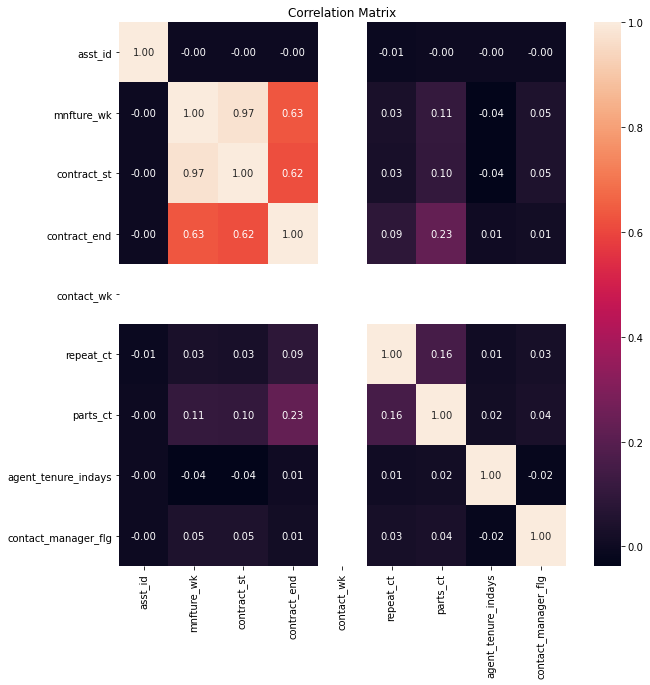

In [42]:
#Plot correlation matrix to understand interdependence between columns
plt.figure(figsize=(10,10))
sns.heatmap(customer_support_data.corr(), annot=True, fmt='0.2f')
plt.title("Correlation Matrix")

There is a highly positive correlation between manufacture week and contract start week. We can say that the contract won't start until the product is manufactured. Similarly contract start week and contract end week are correlated. The product warranty cannot end until it has started.

Text(0.5, 1.0, 'Analysis of the number of requests for each product type')

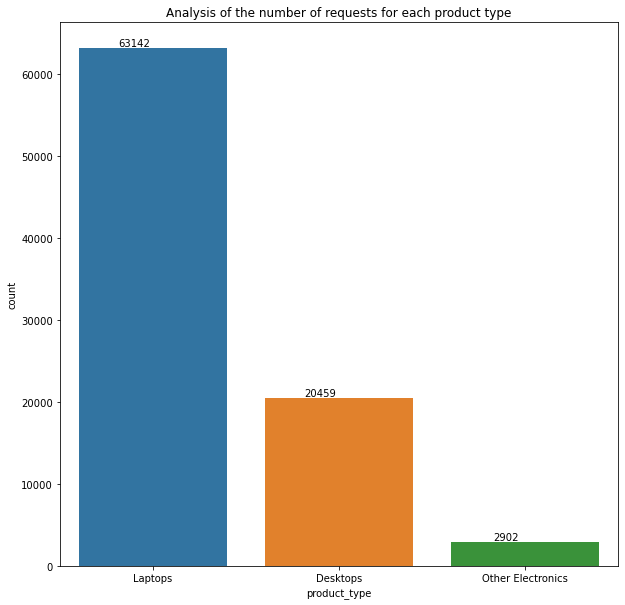

In [43]:
 # Plot for No of requests by Product type
plt.figure(figsize=(10,10))
g=sns.countplot(customer_support_data.product_type)
for p in g.patches:
        g.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
plt.title("Analysis of the number of requests for each product type")

Interpretation: The plot above shows that maximum number of requests (60000+) have come in for laptops. This is followed by Desktops and lastly by other Electronics. This data can be useful for ABC to manage the tech support team. ABC can hire more technicians skilled in Laptop repairs owing to higher demand.

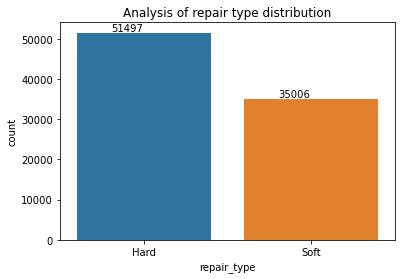

In [44]:
#Plot for No of requests by repair type
g=sns.countplot(customer_support_data.repair_type)
plt.title("Analysis of repair type distribution")
for p in g.patches:
        g.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')

Interpretation: The above plot shows that on an average, 50000+ of the service requests/problems require hard repairs. This data is again useful for managing the tech support team based on the skills desired. 

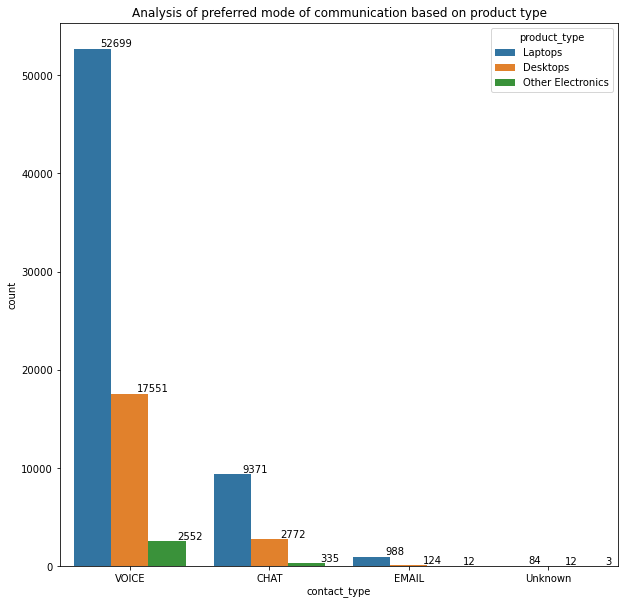

In [45]:
#Preferred mode of communication based on product type
plt.figure(figsize=(10,10))
g=sns.countplot('contact_type', hue='product_type', orient='h',data=customer_support_data)
plt.title("Analysis of preferred mode of communication based on product type")
for p in g.patches:
        g.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')

Interpretation: This plot tells us that the most preferred mode of communication is voice/calls. ABC can use this information to manage it's customer care as they now know that most requests will be coming through phone calls. 

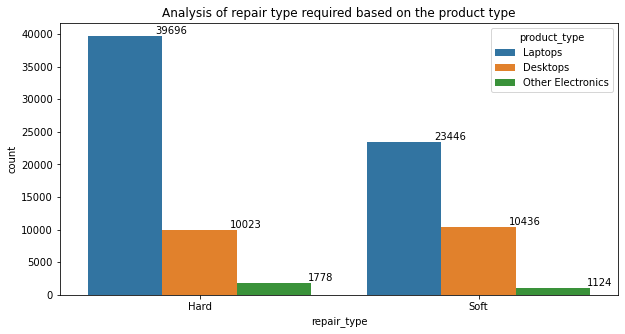

In [46]:
#Plot for no of requests by repair type filtered by product type
plt.figure(figsize=(10,5))
g=sns.countplot(customer_support_data.repair_type, hue='product_type', data=customer_support_data)
plt.title('Analysis of repair type required based on the product type')
for p in g.patches:
         g.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')

Interpretation: The above plot shows distribution of the repair type, filtered by product type. We can see that laptops repair requests are highest in both Hard and Soft repair type.

Text(0.5, 1.0, 'BoxPlot for analyzing parts_sent count across regions for each product type')

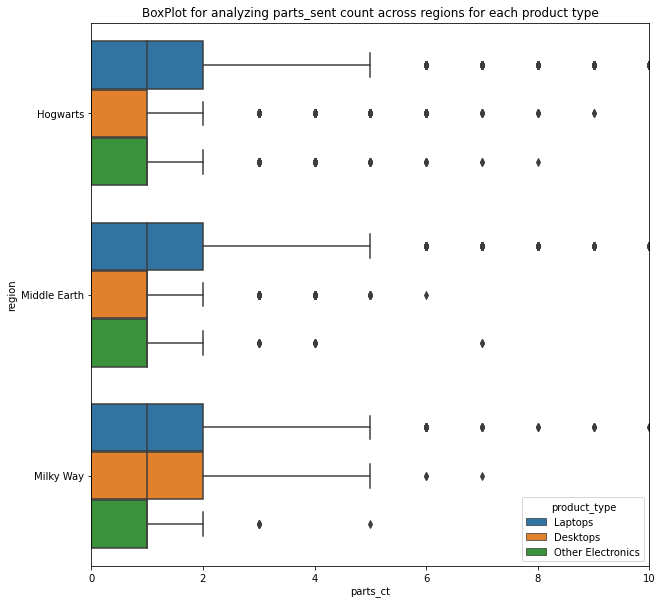

In [47]:
#region wise analysis of parts sent depending on product type
plt.figure(figsize=(10,10))
p1=sns.boxplot(y='region',x='parts_ct',hue='product_type', data=customer_support_data)
p1.set(xlim=(0,10))
plt.title("BoxPlot for analyzing parts_sent count across regions for each product type")

Interpretation: The above box plot shows us the distribution of part count in various regions, grouped by product type. We can see the part count sent for laptops is visibly the highest for all 3 regions with minimum value being 0 and median value being 1.

For Hogwarts and Middle Earth Region:
The maximum part count is 5, 2 and 2 for Laptop, Desktop and other electronics respectively. The quartiles indicate that the range of part count is more widespread for Laptops, ranging from 0 to 5.

We can see the presence of outliers. This corresponds to a situation when the required part count exceeds 5 in case of laptops and exceeds 2 in the case of Desktops and other electronics.


For the Milky way Region:

The maximum part count is 7, 5 and 2 for Laptop, Desktop and other electronics respectively. The quartiles indicate that the range of part count is more widespread for Laptops, ranging from 0 to 7.

We can also see the presence of outliers. This corresponds to a situation when the required part count exceeds 7 in case of laptops and exceeds 5 in the case of Desktops and other electronics.

These outliers seem natural as there could be a situation when a repair may require more than 5 to 7 parts to be replaced/repaired. However, this situation is rare and hence can be rightly looked upon as an outlier.


ABC can utilize this information to manage the demand and supply of the parts that frequently need to be repaired depending upon the product or the issue faced. ABC's Research and Development team can use this information to eliminate the faults with these parts, coming up with newer versions that give them a competitive edge in the market.


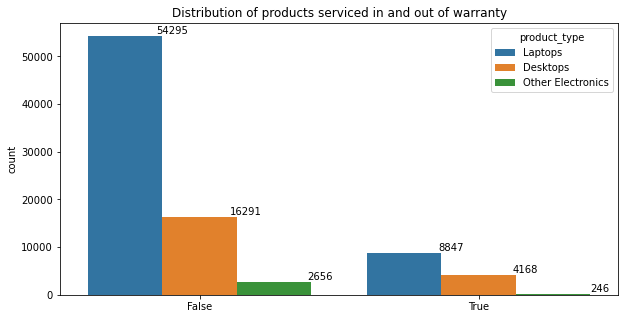

In [48]:
#Distribution of products serviced in and out of warranty
plt.figure(figsize=(10,5))
g=sns.countplot(customer_support_data.contact_wk>customer_support_data.contract_end, hue= customer_support_data.product_type)
plt.title("Distribution of products serviced in and out of warranty")
for p in g.patches:
         g.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')

Interpretation:
This plot tells us which how many service requests came in when the product was in and out of warranty. 'False' denotes products that were in warranty and the True denotes products serviced out of warranty. This analysis is helpful to understand what kind products would face an issue within a few months of manufacture as well as after the expiry of warranty. Here we see that about 18% of the requests came in for products out of warranty and roughly, 66% of these requests came in for Laptops.

ABC can map these out of warranty requests with product issues to understand which issues are likely to occur within a few months of manufacture and which of them can occur after the warranty has expired. This can be beneficial in setting up the warranty plans of the product, addressing commonly seen issues with permanent solutions and providing enhanced customer service. User documentation can be created for commonly occurring issues that customers may resolve themselves. 

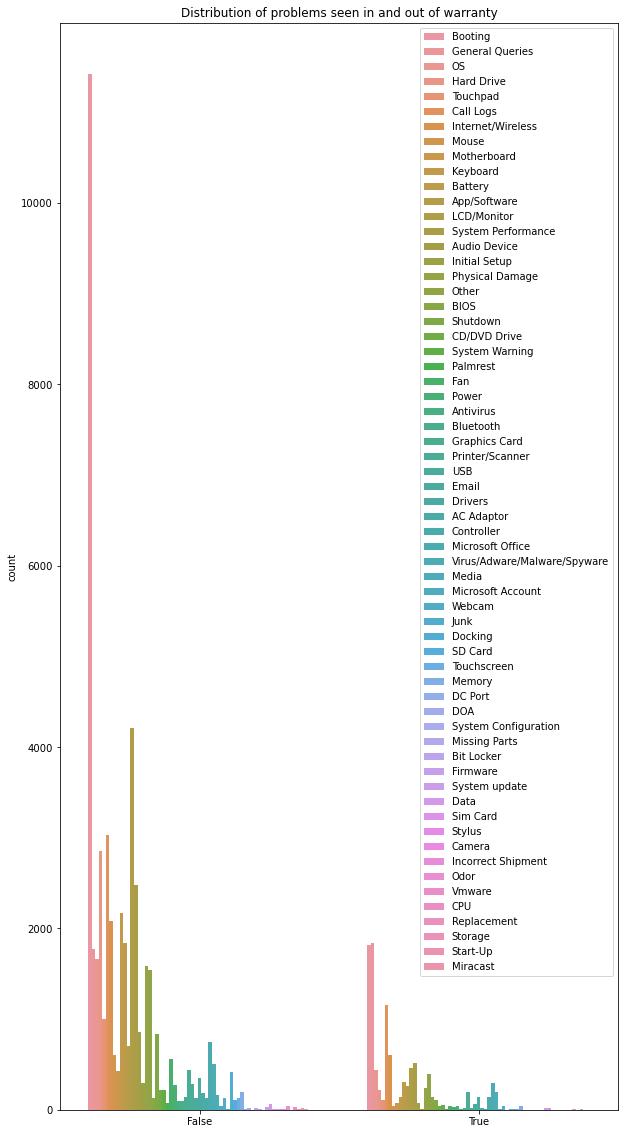

In [49]:
#Plot for no of requests by warranty, filtered by topic_category
plt.figure(figsize=(10,20))
list=['Unknown']
customer_support_data1 =customer_support_data[~customer_support_data.topic_category.isin(list)]
sns.countplot(customer_support_data1.contact_wk>customer_support_data1.contract_end, hue= customer_support_data1.topic_category)
plt.title("Distribution of problems seen in and out of warranty")
plt.legend(loc='upper right')

Interpretation: In this plot we can see the problems reported by tech service agents, categorized as problems occurred when product is in warranty vs problems occurred when product is out of warranty.
We can see in the graph that issues related to booting, OS, hard drive, touchpad, battery, app/software or physical damage are seen more commonly when the product is out of warranty.

The ABC team can design their service request forms such that there is a drop down to select the Problem category so that this data is available easily.
Help guides and manuals can be created for the commonly encountered problems. Service requests can be automated, and a seperate team can be created to provide expedite service for addressing known issues, reducing waiting time of the customers.

Text(0.5, 1.0, 'Analysis of the involvement of the manager for a repair type')

<Figure size 720x360 with 0 Axes>

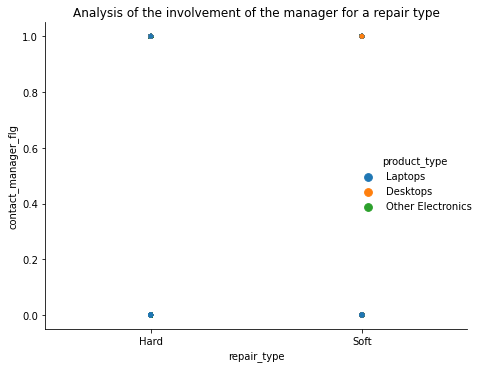

In [50]:
#Analysis of the involvement of the manager for a repair type
plt.figure(figsize=(10,5))
sns.catplot(x='repair_type', y='contact_manager_flg', hue='product_type', data=customer_support_data, jitter=False)
plt.tight_layout()
plt.title("Analysis of the involvement of the manager for a repair type")

Interpretation: The above plot can be used to analyze the severity/complexity of an issue based on whether a manager's involvement was necessary for resolving it. We can see the plot shows the involvement of contact manager for both hard and soft repair type, categorized by product type. We see that for laptops, for both hard and soft repairs, manager involvement was seen, while for Desktops manager involvement was required for performing hard repairs.

However, there may be other factors that contribute to this decision rather than just the product type or the repair type.
This information could be useful in laying out the request resolution plan depending on the severity of the issue. Manager involvement may also mean that some issues require more access privileges which a technician may not have.

In [51]:
#No of requests for each topic category grouped by repair type
plt.figure(figsize=(100,100))
list=['Unknown']
customer_support_data1 =customer_support_data[~customer_support_data.topic_category.isin(list)]
g=sns.countplot(customer_support_data1.topic_category, hue='repair_type', data=customer_support_data1)
g.set_xticklabels(g.get_xticklabels(), rotation=45, ha="right", size=50)
plt.tight_layout()
plt.legend(loc='upper right')
for p in g.patches:
        g.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                   ha='center', va='bottom',
                   color= 'black')

Interpretation: The above graph shows number of requests for each topic category, grouped by repair type. We can see that overall, the hard repair type for various topics is more prominent than the soft repair type. The requests are higher in number for booting, general queries, OS, Hard drive and System performance issues. Maximum hard repair type requests are seen for booting and LCD/Monitor issues.

<Figure size 14400x7200 with 0 Axes>

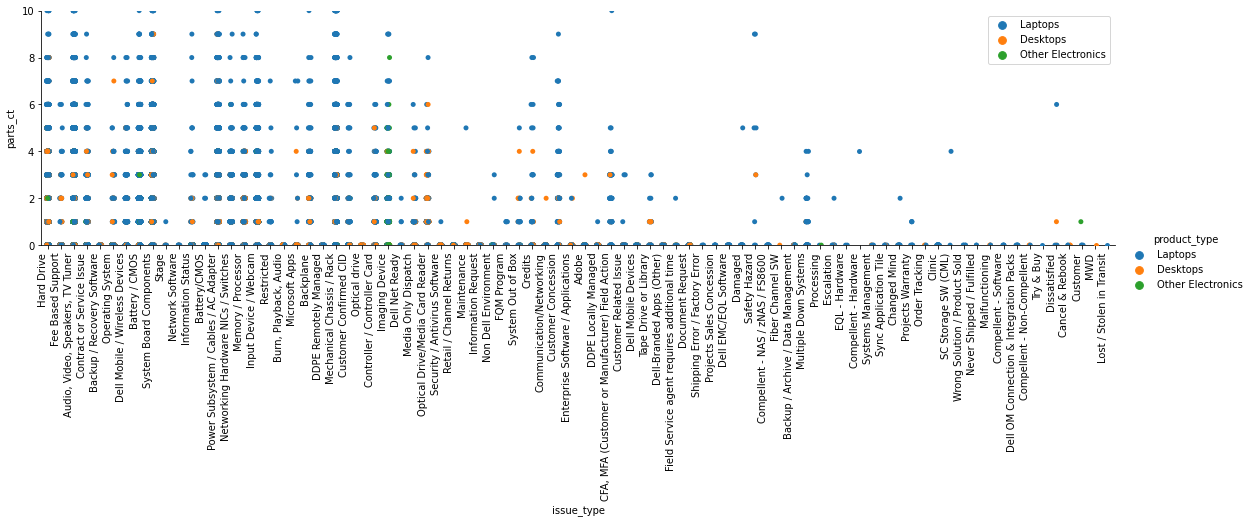

In [52]:
#Analysis of no of parts sent for each issue, the hue denotes product type
plt.figure(figsize=(200, 100))
list=['Unknown']
customer_support_data1 =customer_support_data[~customer_support_data.issue_type.isin(list)]
p2=sns.catplot(x='issue_type',y='parts_ct', hue='product_type', data=customer_support_data1, height=4, aspect=4)
p2.set_xticklabels(rotation=90, ha="right")
#plt.tight_layout()
p2.set(ylim=(0,10))
plt.legend(loc='upper right')

Interpretation: In this plot, we see the number of parts that were sent for each issue_type. The hue parameter differentiates the part count by product type. Overall we can see that for Laptops, the part count ranges between 0 to 10 and a higher count can be seen for issues like HardDrive, Battery, Controller Cards, Optical drive, mechanical chassis, etc. 
The part count seems to be less for Desktop issues. This could indicate that a large number of Desktop issues can be handled without replacement of the parts.

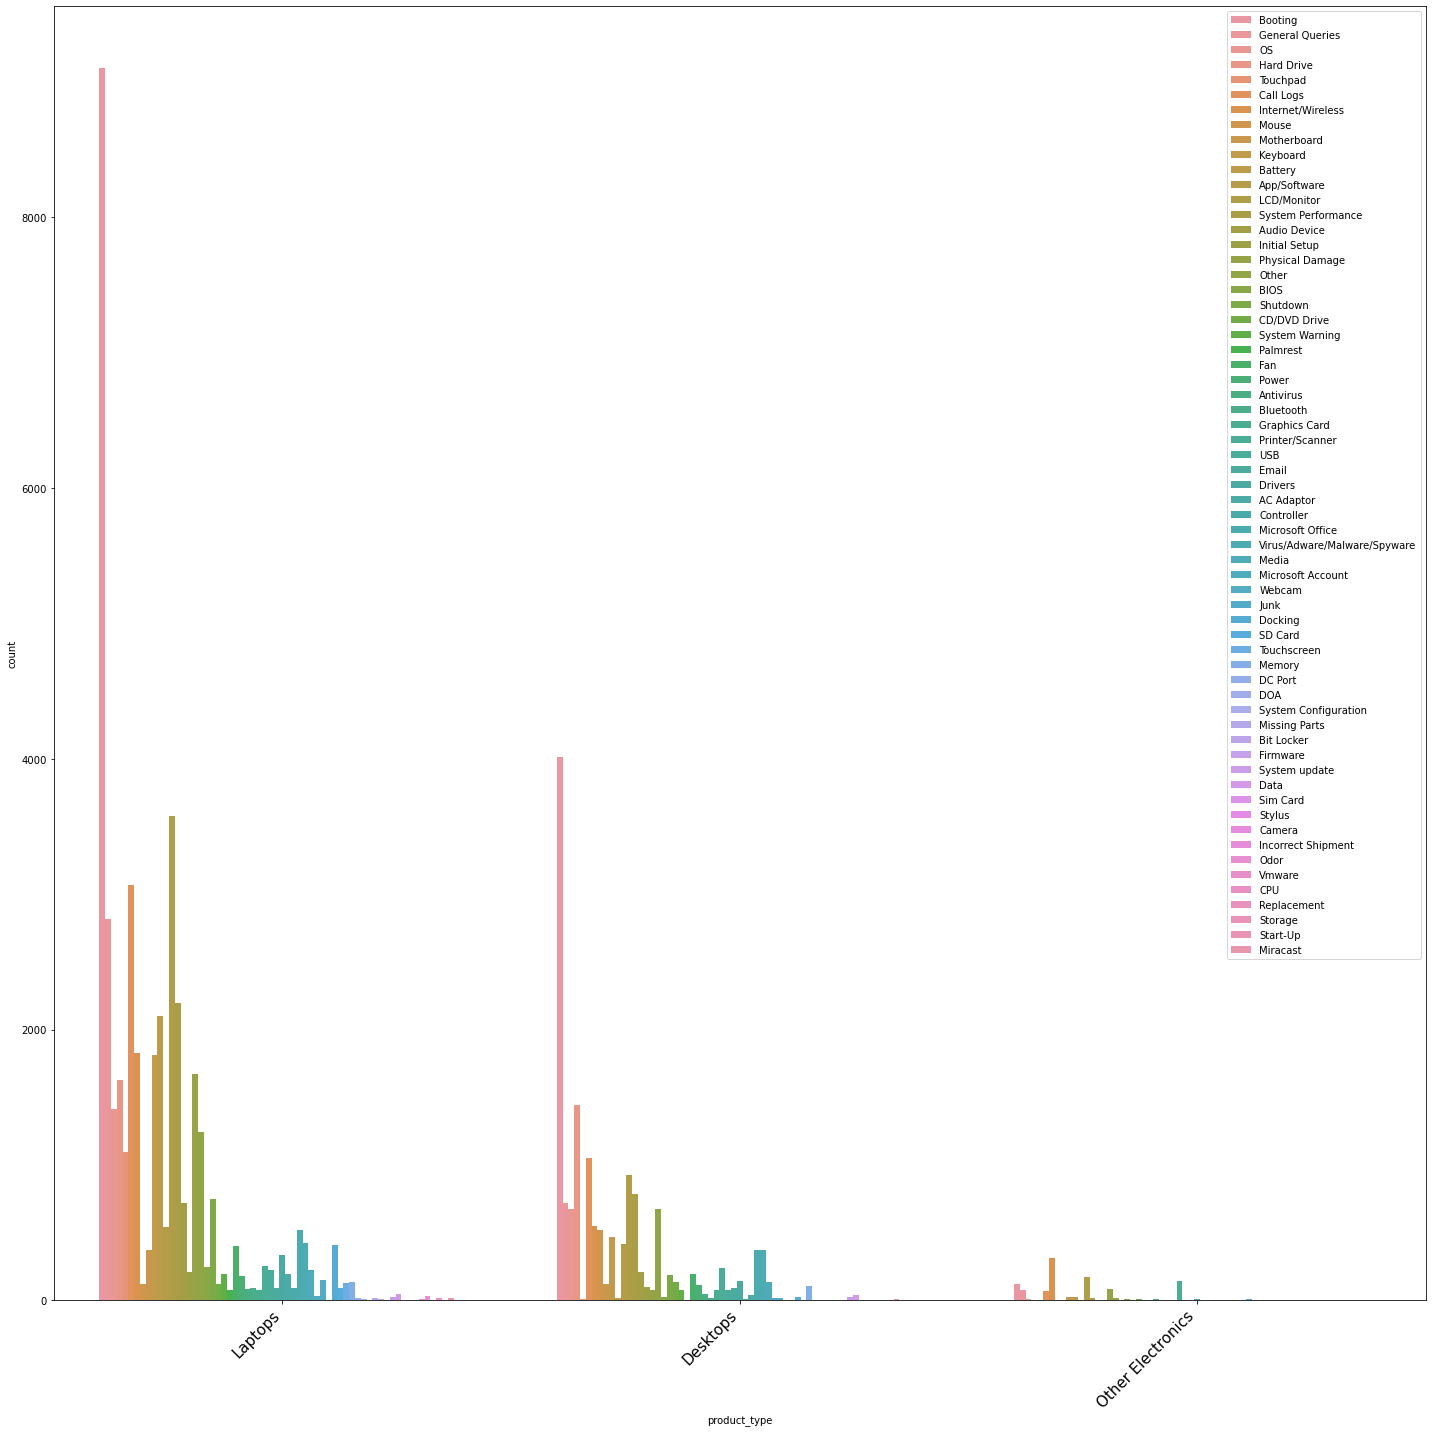

In [53]:
#No of requests for each product type grouped by topic category
plt.figure(figsize=(20,20))
list=['Unknown']
customer_support_data1 =customer_support_data[~customer_support_data.topic_category.isin(list)]
p4=sns.countplot('product_type', hue='topic_category', data=customer_support_data1)
p4.set_xticklabels(p4.get_xticklabels(), rotation=45, ha="right", size=15)
plt.tight_layout()
plt.legend(loc='upper right')

Interpretation: The plot above shows the number of requests for each product, categorized by the topic_category. We can again infer that overall, maximum requests have come in for laptops and major problems faced are 'Booting','OS', 'Hard drive', 'Touchpad', 'LCD/Monitor' and 'System Performance'.

Text(0.5, 1.0, 'Analysis of Agent Tenure across Countries')

<Figure size 2160x2160 with 0 Axes>

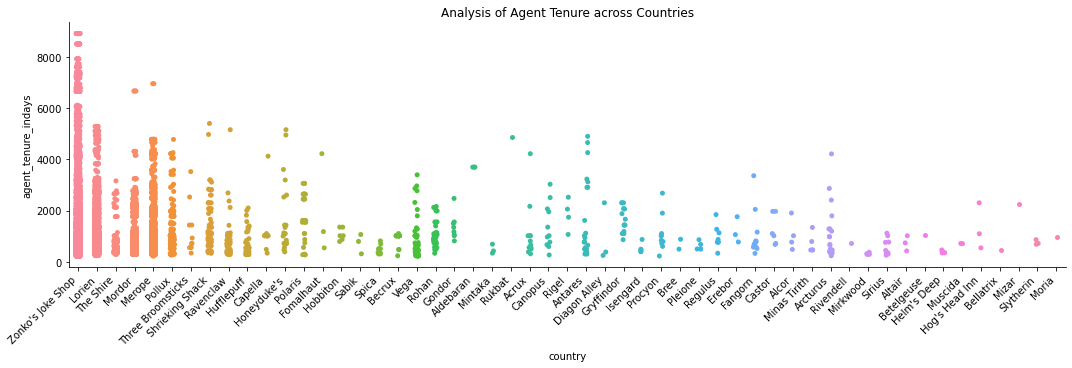

In [54]:
#Analysis of Agent Tenure across Countries where asset is located
plt.figure(figsize=(30,30))
list=['Unknown']
customer_support_data1 =customer_support_data[~customer_support_data.country.isin(list)]
customer_support_data1.head()
g=sns.catplot(x='country', y='agent_tenure_indays', data=customer_support_data1, height=5, aspect=3)
g.set_xticklabels(rotation=45, ha="right")
plt.tight_layout()
plt.title("Analysis of Agent Tenure across Countries")

Interpretation: This plot provides shows the Agent tenure in days across countries where the asset is located. This plot is helpful in analyzing which country has the most experienced Agents. 
This information can help a great deal in analyzing the response time on the service request when it is handled by an experienced agent as opposed to being handled by a novice agent.
ABC can make use of this analysis for delegating requests to agents depending on the severity of the issue and the agent's expertise, in order to reduce response time and provide quicker solutions 

In [55]:
# Plot of No of requests by issue type, filtered by product type
plt.figure(figsize=(200, 200))
list=['Unknown']
customer_support_data1 =customer_support_data[~customer_support_data.issue_type.isin(list)]
p2=sns.countplot('issue_type', hue='product_type', data=customer_support_data1)
p2.set_xticklabels(p2.get_xticklabels(),rotation=45, ha="right")
plt.tight_layout()
plt.title("No of requests by issue type, filtered by product type")
plt.legend(loc='upper right')

Interpretation:This plot shows the number of requests that have come by for issue, categorized by product type. This information is very useful to understand the commonly occurring issues in each product. 

ABC can increase it's productivity and customer satisfaction index by predefining solutions for frequently occurring issues, resulting in low response time.

# Pandas Profiling 

Pandas Profiling tool is used for a quick Exploratory data analysis for obtaining some descriptive statistics. I have added this step for showing some statistical analysis, which might have been covered and used in the earlier exploratory data analysis. This profiling tool is useful for a quick data exploration. 
I used the tool on cleaned data, but it can also be used on raw data to obtain some quick statistical insight into the data. The aim behind adding this code snippet was to showcase the usage of pandas profiling tool.

In [56]:
pip install pandas-profiling

In [57]:
from pandas_profiling import ProfileReport
prof = ProfileReport(customer_support_data)
prof